In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [5]:
cd "Colab Notebooks/"

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# cd wa_522_proj

In [ ]:
path = '/MyDrive/Colab Notebooks/wa_522_proj/'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import torch.backends
from torch.nn import Module, Linear, ReLU, Sequential
from torch.optim import SGD
from torch.nn import MSELoss

if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.backends.cudnn.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device = torch.device("cpu")
print("Using device:", device)

Using device: cpu


In [7]:
plt.rcParams['figure.figsize'] = (5,5)

# Generate Data

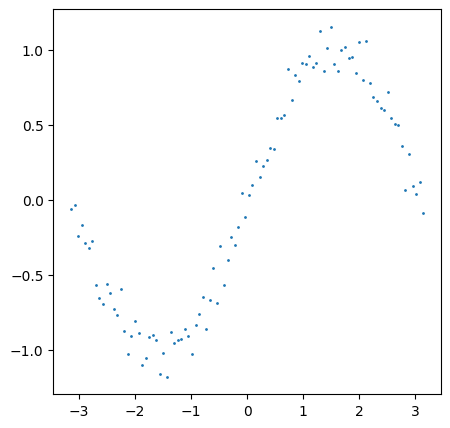

In [8]:
f = np.sin

x = np.linspace(- np.pi, np.pi, 100)
eps = np.random.normal(0, 0.1, 100)

y = f(x) + eps

plt.scatter(x, y, s=1)
plt.show()

x_train = x
y_train = y

In [9]:
# Create Data Set
x = torch.tensor(x, dtype=torch.float32, device=device).reshape(-1, 1)
y = torch.tensor(y, dtype=torch.float32, device=device).reshape(-1, 1)

# Create Data Loader
batch_size = 10
data = torch.utils.data.TensorDataset(x, y)
loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)

# Train Model

In [10]:
class NNModel(Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(NNModel, self).__init__()

        self.num_layers = num_layers

        self.linear_in = Linear(input_size, hidden_size)
        self.linear_out = Linear(hidden_size, output_size)
        self.relu = ReLU()

        mids = [Linear(hidden_size, hidden_size) for _ in range(num_layers)]
        self.seq = Sequential(*[layer for sublist in zip(mids, [ReLU()]*num_layers) for layer in sublist])
        
    def forward(self, x):
        out = self.linear_in(x)
        out = self.seq(out)
        out = self.relu(out)
        out = self.linear_out(out)
        return out
      

def initialize(fhat):
    # Initialize weights to be close to 0
    for param in fhat.parameters():
        param.data.normal_(0, 0.01)

def train(fhat):
    # Training Loop
    optimizer = SGD(fhat.parameters(), lr=0.01)
    reg = 0.001
    criterion = MSELoss()
    epochs = 1001

    losses = []
    for epoch in range(epochs):
        for x, y in loader:
            optimizer.zero_grad()
            yhat = fhat(x)
            
            loss = criterion(yhat, y) + reg * (torch.sum(fhat.linear_in.weight ** 2) + torch.sum(fhat.linear_out.weight ** 2))
            for layer in fhat.seq[::2]:
              loss += reg * torch.sum(layer.weight**2)

            loss.backward()
            optimizer.step()
        if epoch % 100 == 0:
            print("Epoch: %d, Loss: %f" % (epoch, loss.item()))
        losses.append(loss.item())
    
    return np.array(losses)
        

In [11]:
n_layers = np.arange(1,21)

for l in n_layers:
    print(f"Training model with {l} layers")
    fhat = NNModel(1, 10, l, 1).to(device)
    initialize(fhat)
    loss = train(fhat)

    # Save the model
    my_dict = fhat.state_dict()
    torch.save(my_dict, f"models10/model_{l}.pt")

    # Save the loss
    np.save(f"models10/loss_{l}.npy", loss)

    print()

Training model with 1 layers
Epoch: 0, Loss: 0.524492
Epoch: 100, Loss: 0.583591
Epoch: 200, Loss: 0.365820
Epoch: 300, Loss: 0.214402
Epoch: 400, Loss: 0.130831
Epoch: 500, Loss: 0.101776
Epoch: 600, Loss: 0.169442
Epoch: 700, Loss: 0.084142
Epoch: 800, Loss: 0.080213
Epoch: 900, Loss: 0.026690
Epoch: 1000, Loss: 0.028248

Training model with 2 layers
Epoch: 0, Loss: 0.430853
Epoch: 100, Loss: 0.651140
Epoch: 200, Loss: 0.470332
Epoch: 300, Loss: 0.606959
Epoch: 400, Loss: 0.392682
Epoch: 500, Loss: 0.437902
Epoch: 600, Loss: 0.636762
Epoch: 700, Loss: 0.474587
Epoch: 800, Loss: 0.583025
Epoch: 900, Loss: 0.625768
Epoch: 1000, Loss: 0.492666

Training model with 3 layers
Epoch: 0, Loss: 0.639747
Epoch: 100, Loss: 0.448086
Epoch: 200, Loss: 0.426516
Epoch: 300, Loss: 0.412044
Epoch: 400, Loss: 0.525804
Epoch: 500, Loss: 0.406859
Epoch: 600, Loss: 0.632225
Epoch: 700, Loss: 0.699001
Epoch: 800, Loss: 0.424268
Epoch: 900, Loss: 0.538161
Epoch: 1000, Loss: 0.338196

Training model with 4 

In [12]:
n_params = 10

fhat1 = NNModel(1, n_params, 1, 1).to(device)
fhat1.load_state_dict(torch.load(f'models{n_params}/model_1.pt'))

fhat2 = NNModel(1, n_params, 2, 1).to(device)
fhat2.load_state_dict(torch.load(f'models{n_params}/model_2.pt'))

fhat3 = NNModel(1, n_params, 3, 1).to(device)
fhat3.load_state_dict(torch.load(f'models{n_params}/model_3.pt'))

fhat4 = NNModel(1, n_params, 4, 1).to(device)
fhat4.load_state_dict(torch.load(f'models{n_params}/model_4.pt'))

fhat5 = NNModel(1, n_params, 5, 1).to(device)
fhat5.load_state_dict(torch.load(f'models{n_params}/model_5.pt'))

fhat6 = NNModel(1, n_params, 6, 1).to(device)
fhat6.load_state_dict(torch.load(f'models{n_params}/model_6.pt'))

fhat7 = NNModel(1, n_params, 7, 1).to(device)
fhat7.load_state_dict(torch.load(f'models{n_params}/model_7.pt'))

fhat8 = NNModel(1, n_params, 8, 1).to(device)
fhat8.load_state_dict(torch.load(f'models{n_params}/model_8.pt'))

fhat9 = NNModel(1, n_params, 9, 1).to(device)
fhat9.load_state_dict(torch.load(f'models{n_params}/model_9.pt'))

fhat10 = NNModel(1, n_params, 10, 1).to(device)
fhat10.load_state_dict(torch.load(f'models{n_params}/model_10.pt'))

fhat11 = NNModel(1, n_params, 11, 1).to(device)
fhat11.load_state_dict(torch.load(f'models{n_params}/model_11.pt'))

fhat12 = NNModel(1, n_params, 12, 1).to(device)
fhat12.load_state_dict(torch.load(f'models{n_params}/model_12.pt'))

fhat13 = NNModel(1, n_params, 13, 1).to(device)
fhat13.load_state_dict(torch.load(f'models{n_params}/model_13.pt'))

fhat14 = NNModel(1, n_params, 14, 1).to(device)
fhat14.load_state_dict(torch.load(f'models{n_params}/model_14.pt'))

fhat15 = NNModel(1, n_params, 15, 1).to(device)
fhat15.load_state_dict(torch.load(f'models{n_params}/model_15.pt'))

fhat16 = NNModel(1, n_params, 16, 1).to(device)
fhat16.load_state_dict(torch.load(f'models{n_params}/model_16.pt'))

fhat17 = NNModel(1, n_params, 17, 1).to(device)
fhat17.load_state_dict(torch.load(f'models{n_params}/model_17.pt'))

fhat18 = NNModel(1, n_params, 18, 1).to(device)
fhat18.load_state_dict(torch.load(f'models{n_params}/model_18.pt'))

fhat19 = NNModel(1, n_params, 19, 1).to(device)
fhat19.load_state_dict(torch.load(f'models{n_params}/model_19.pt'))

fhat20 = NNModel(1, n_params, 20, 1).to(device)
fhat20.load_state_dict(torch.load(f'models{n_params}/model_20.pt'))

my_models = [fhat1, fhat2, fhat3, fhat4, fhat5, fhat6, fhat7, fhat8, fhat9, fhat10, fhat11, fhat12, fhat13, fhat14, fhat15, fhat16, fhat17, fhat18, fhat19, fhat20]

# Test the suckers

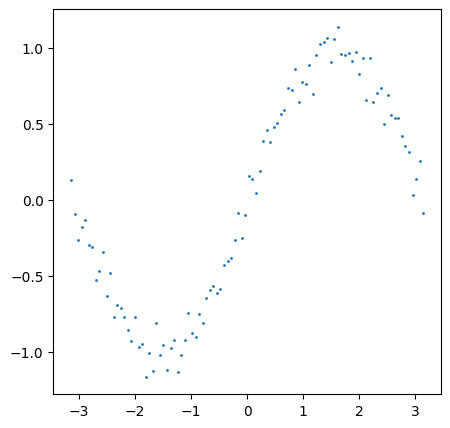

In [ ]:
dom_test = np.linspace(-np.pi, np.pi, 100)
eps_test = np.random.normal(0, 0.1, 100)

range_test = f(dom_test) + eps_test

plt.scatter(dom_test, range_test, s=1)
plt.show()

In [ ]:
# Create Data Set
x_test = torch.tensor(dom_test, dtype=torch.float32, device=device).reshape(-1, 1)
y_test = torch.tensor(range_test, dtype=torch.float32, device=device).reshape(-1, 1)

# Create Data Loader
batch_size = 10
data_test = torch.utils.data.TensorDataset(x_test, y_test)
loader_test = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)

In [ ]:
preds = []
diffs = []

for fhat in my_models:
  preds.append(fhat(x_test).cpu().detach().numpy())
  diffs.append(preds[-1]-f(dom_test))

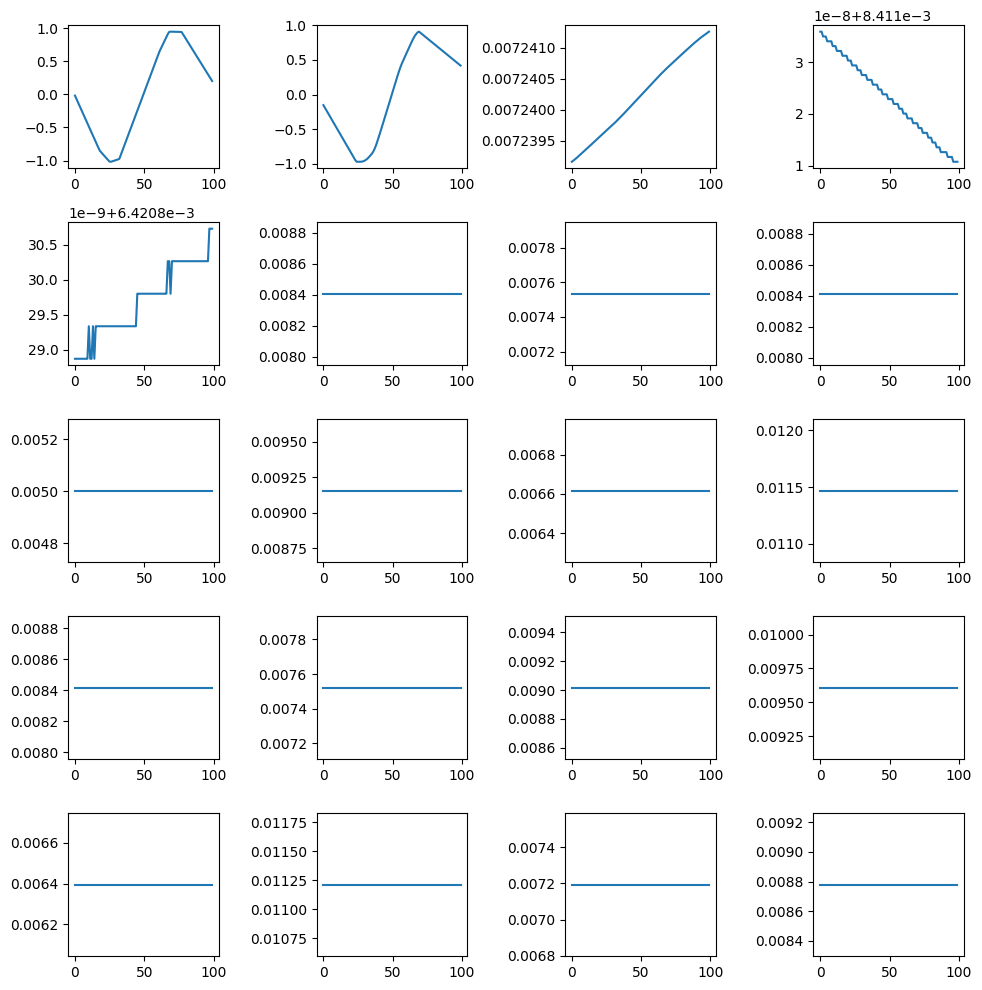

In [ ]:
plt.figure(figsize=(10,10))

for i, pred in enumerate(preds):
  plt.subplot(5,4,i+1)
  plt.plot(pred)

plt.tight_layout()
plt.show()

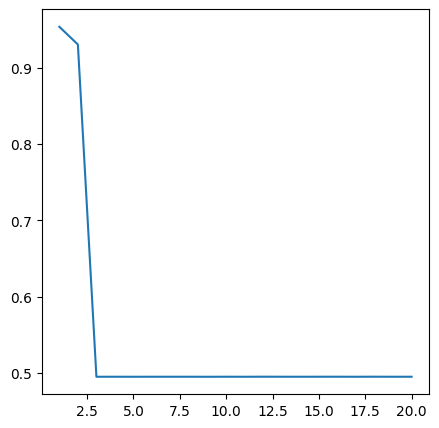

In [ ]:
my_MSE = [np.mean(diff**2) for diff in diffs]
plt.plot(np.arange(1,21),my_MSE)
plt.show()

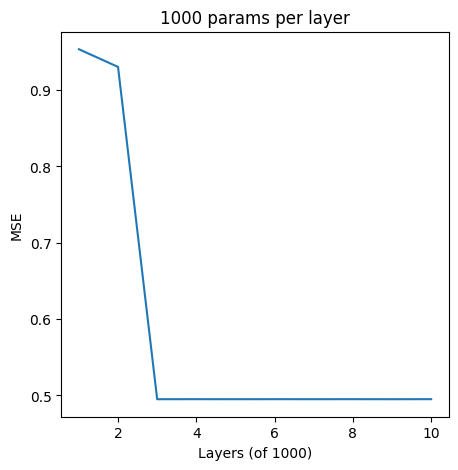

In [ ]:
my_MSE = [np.mean(diff**2) for diff in diffs[:10]]
plt.plot(np.arange(1,11),my_MSE)
plt.title('100 params per layer')
plt.xlabel('Layers (of 1000)')
plt.ylabel('MSE')
plt.show()

# 10000 for 1 to 5 layers

In [ ]:
dom = np.linspace(-np.pi, np.pi, 1000)
x = torch.tensor(dom, dtype=torch.float32, device=device).reshape(-1, 1)
y = torch.tensor(np.sin(dom), dtype=torch.float32, device=device).reshape(-1, 1)
pred = np.squeeze(fhat20(x).cpu().detach().numpy())
diff = pred - f(dom)

plt.hist(pred-f(dom), bins=100, density=True)
plt.show()

In [ ]:
pred1 = np.squeeze(fhat1(x_test).cpu().detach().numpy())
diff1 = pred1 - f(dom_test)

pred2 = np.squeeze(fhat2(x_test).cpu().detach().numpy())
diff2 = pred2 - f(dom_test)

pred3 = np.squeeze(fhat3(x_test).cpu().detach().numpy())
diff3 = pred3 - f(dom_test)

pred4 = np.squeeze(fhat4(x_test).cpu().detach().numpy())
diff4 = pred4 - f(dom_test)

pred5 = np.squeeze(fhat5(x_test).cpu().detach().numpy())
diff5 = pred5 - f(dom_test)

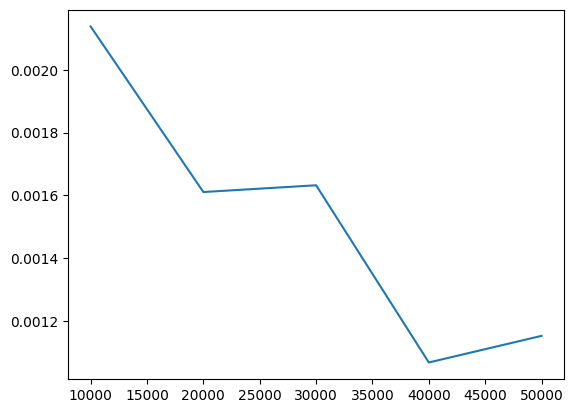

In [ ]:
plt.plot(np.arange(1,6)*10000, [np.mean(diff1**2), np.mean(diff2**2), np.mean(diff3**2), np.mean(diff4**2), np.mean(diff5**2)])
plt.show()

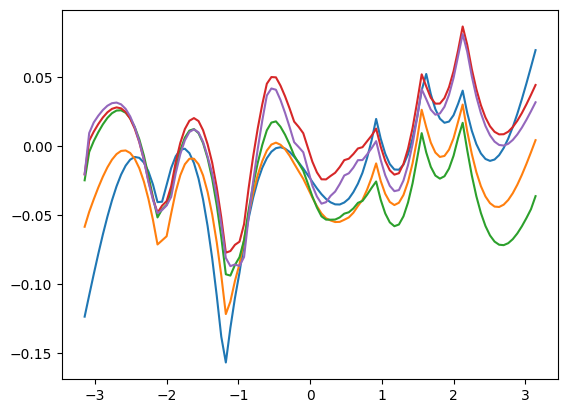

In [ ]:
plt.plot(dom_test, diff1, label='1 layer')
plt.plot(dom_test, diff2, label='2 layer')
plt.plot(dom_test, diff3, label='3 layer')
plt.plot(dom_test, diff4, label='4 layer')
plt.plot(dom_test, diff5, label='5 layer')
plt.legend()
plt.show()